In [71]:
! pip install datetime pandas matplotlib

In [72]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
user_input = '/Users/atharvchandratre/Workspace/Atharv/GitHub/PrismBenchmarkAnalyzer/prism_1.log' # Enter path to log here
assert os.path.exists(user_input), "I did not find the file at "+str(user_input)
f = open(user_input,'r')
print("Log File found, beginning analysis...")
f.close()

Log File found, beginning analysis...


In [74]:
ProposerBlockMined = 'ProposerBlockMined'
ValidProposerBlockDownloaded = 'ValidProposerBlockDownloaded'
ProposerBlockConfirmed = 'ProposerBlockConfirmed'
ProposerBlockRolledBack = 'ProposerBlockRolledBack'
epoch = datetime.utcfromtimestamp(0)

hashToNumber = {}
hashToCreationTimestamp = {}
hashToCreationEvent = {}
hashToConfirmationTimestamp = {}
hashToRollbackTimestamp = {}

In [75]:
def getTimestamp(timestr):
    dateTimeObj = datetime.strptime(timestr, '%Y-%m-%d %H:%M:%S,%f')
    delta = dateTimeObj - epoch
    return delta.total_seconds()*1000

In [76]:
with open(user_input, 'r') as f:
    for line in f:
        if "BENCHMARKING:" not in line:
            continue
        benchmarkSubstrings = line[line.find("BENCHMARKING"):-1].split(':')
        dateTimeString = line.split('[')[0][:-1]
        timestamp = getTimestamp(dateTimeString)
        event = benchmarkSubstrings[1]
        blockNumber = benchmarkSubstrings[3]
        blockHash = benchmarkSubstrings[-1][1:-1]
        if event == ProposerBlockMined or event == ValidProposerBlockDownloaded:
            if hashToCreationTimestamp.get(blockHash)!=None:
                continue
            hashToNumber[blockHash] = blockNumber
            hashToCreationEvent[blockHash] = event
            hashToCreationTimestamp[blockHash] = timestamp
        if event == ProposerBlockConfirmed:
            if hashToConfirmationTimestamp.get(blockHash)!=None:
                continue
            hashToNumber[blockHash] = blockNumber
            hashToConfirmationTimestamp[blockHash] = timestamp
        if event == ProposerBlockRolledBack:
            if hashToRollbackTimestamp.get(blockHash)!=None:
                continue
            hashToNumber[blockHash] = blockNumber
            hashToRollbackTimestamp[blockHash] = timestamp

f.close()

In [77]:
df = pd.DataFrame(columns=['Block Hash','Block Number','Timestamp - Creation','Event','Timestamp - Confirmation','Timestamp - Rollback'])

for index,key in enumerate(hashToNumber.keys()):
    df.loc[index] = [key,
        int(hashToNumber.get(key,'')),
        int(hashToCreationTimestamp.get(key,-1)),
        hashToCreationEvent.get(key,''),
        int(hashToConfirmationTimestamp.get(key,-1)),
        int(hashToRollbackTimestamp.get(key,-1))]

df.sort_values('Block Number')

,Block Hash,Block Number,Timestamp - Creation,Event,Timestamp - Confirmation,Timestamp - Rollback
0,0x1e28434cdacb625c84541955f412eb73d77bda14c4ef...,1,1643013251730,ProposerBlockMined,1643013924597,-1
1,0x3e9885fd11cf4035c32e8218ca3ce1c62744252f2d23...,2,1643013283318,ValidProposerBlockDownloaded,1643014016480,-1
2,0xe64aa7709a28d45156819fcf727e73b97c298b062f80...,3,1643013283462,ValidProposerBlockDownloaded,1643014021142,-1
3,0x65ff295b14bf8dbac1607805b2e02ce8d243671213ee...,4,1643013301041,ValidProposerBlockDownloaded,1643014093188,-1
4,0xcc67681c093d87f5a34b368d3f15482e0b6286a044f2...,5,1643013315564,ProposerBlockMined,1643014157967,-1
5,0x03791133fb062df1fed3d077c9cd6eb05be36020f96e...,6,1643013335167,ValidProposerBlockDownloaded,1643014220582,-1
6,0xec33ec31ea2bc49a61fe592e9a7175382e78bd3967f1...,7,1643013337354,ProposerBlockMined,1643014226751,-1
7,0x05813e133199bd8f1deb4b3b36cc97c7fa1d0c0d0cc3...,8,1643013339085,ValidProposerBlockDownloaded,1643014228797,-1
8,0x36c99bc82302b773009e6b5a36f6a15b97730631879a...,9,1643013339409,ProposerBlockMined,1643014242626,-1
9,0x0d3a65adf7b03c47e7746f44f15f2c3a3e0a599a3a40...,10,1643013454234,ValidProposerBlockDownloaded,-1,-1


In [78]:
df['Latency'] = df[df['Timestamp - Confirmation']!=-1]['Timestamp - Confirmation']-df[df['Timestamp - Confirmation']!=-1]['Timestamp - Creation']
df['Mining Time'] = df['Timestamp - Creation'].diff()
df['Confirmation Depth']=df['Latency']/df['Mining Time']

In [92]:
print("Mean Proposer Confirmation Latency =",int(df['Latency'].dropna().mean()/1000), "seconds")
print("Median Proposer Confirmation Latency =",int(df['Latency'].dropna().median()/1000), "seconds")
print("Mean Proposer Block Arrival Time =", int(df['Mining Time'].dropna().mean()/1000), "seconds")
print("Median Proposer Block Arrival Time =",int(df['Mining Time'].dropna().median()/1000), "seconds")

Mean Proposer Confirmation Latency = 816 seconds
Median Proposer Confirmation Latency = 842 seconds
Mean Proposer Block Arrival Time = 37 seconds
Median Proposer Block Arrival Time = 19 seconds


In [94]:
creationTimestamps = df['Timestamp - Creation']
confirmationTimestamps = df[df['Timestamp - Confirmation']!=-1]['Timestamp - Confirmation']
insertionPoints = pd.DataFrame(creationTimestamps.searchsorted(value=confirmationTimestamps),columns=['Insertion Points'])
cdArray = insertionPoints['Insertion Points'] - insertionPoints['Insertion Points'].index
print("Calculated Mean Confirmation Depth =",int(cdArray.mean()), "blocks")
print("Calculated Median Confirmation Depth =",int(cdArray.median()), "blocks")

Calculated Mean Confirmation Depth = 19 blocks
Calculated Median Confirmation Depth = 20 blocks


In [107]:
rollbackProposerBlocks = len(df[df['Timestamp - Rollback']!=-1])
confirmedProposerBlocks = len(df[df['Timestamp - Confirmation']!=-1])

print("Number of rolled back proposer blocks = ", rollbackProposerBlocks, "blocks")
print("Number of confirmed proposer blocks = ", confirmedProposerBlocks, "blocks")
print("Rollback ratio = ", int(rollbackProposerBlocks*100/confirmedProposerBlocks), "%")

Number of rolled back proposer blocks =  0 blocks
Number of confirmed proposer blocks =  9 blocks
Rollback ratio =  0 %


In [81]:
proposerBlockNumbersArray = []
voterChainBestTopBlocksArray = []
with open(user_input, 'r') as f:
    for line in f:
        if "VOTERCHAINHEALTH:" not in line:
            continue
        benchmarkSubstrings = line[line.find("VOTERCHAINHEALTH"):-1].split(':')
        proposerBlockNumber = int(benchmarkSubstrings[-2][:(benchmarkSubstrings[-2].find("(")-1)])
        voterChainBestTopBlock = int(benchmarkSubstrings[4])
        proposerBlockNumbersArray.append(proposerBlockNumber)
        voterChainBestTopBlocksArray.append(voterChainBestTopBlock)


f.close()

In [82]:
firstTimeStamp = df['Timestamp - Creation'][0]

proposerBlocksCoordinates = [[],[]]
proposerBlocksMinedOnlyCoordinates = [[],[]]
proposerBlockDownloadedOnlyCoordinates = [[],[]]

with open(user_input, 'r') as f:
    for line in f:
        if "BENCHMARKING:" not in line:
            continue
        benchmarkSubstrings = line[line.find("BENCHMARKING"):-1].split(':')
        dateTimeString = line.split('[')[0][:-1]
        timestamp = getTimestamp(dateTimeString)
        event = benchmarkSubstrings[1]
        blockNumber = int(benchmarkSubstrings[3])
        if event == ProposerBlockMined:
            proposerBlocksCoordinates[0].append(blockNumber)
            proposerBlocksCoordinates[1].append((timestamp-firstTimeStamp)/1000)
            proposerBlocksMinedOnlyCoordinates[0].append(blockNumber)
            proposerBlocksMinedOnlyCoordinates[1].append((timestamp-firstTimeStamp)/1000)
        if event == ValidProposerBlockDownloaded:
            proposerBlocksCoordinates[0].append(blockNumber)
            proposerBlocksCoordinates[1].append((timestamp-firstTimeStamp)/1000)
            proposerBlockDownloadedOnlyCoordinates[0].append(blockNumber)
            proposerBlockDownloadedOnlyCoordinates[1].append((timestamp-firstTimeStamp)/1000)
f.close()


voterChainsCoordinates = []
for i in range(0,100):
    voterChainsCoordinates.append([[],[]])

with open(user_input, 'r') as f:
    for line in f:
        if "VOTERCHAINHEALTH:" not in line:
            continue
        benchmarkSubstrings = line[line.find("VOTERCHAINHEALTH"):-1].split(':')
        dateTimeString = line.split('[')[0][:-1]
        timestamp = getTimestamp(dateTimeString)
        voterChainBestTopBlock = int(benchmarkSubstrings[4])
        voterChainIdx = int(benchmarkSubstrings[2])
        voterChainsCoordinates[voterChainIdx][0].append(voterChainBestTopBlock)
        voterChainsCoordinates[voterChainIdx][1].append((timestamp-firstTimeStamp)/1000)
f.close()

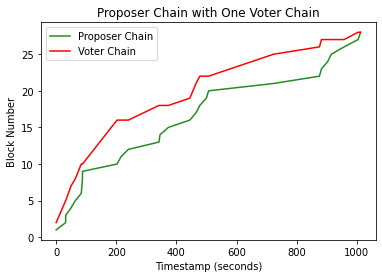

In [109]:
voterChainToSee = 60

plt.plot(proposerBlocksCoordinates[1], proposerBlocksCoordinates[0], c ="forestgreen", label="Proposer Chain")
plt.plot(voterChainsCoordinates[voterChainToSee][1], voterChainsCoordinates[voterChainToSee][0], c="red", label="Voter Chain") 
plt.legend(loc="upper left")

 
# To show the plot
plt.title("Proposer Chain with One Voter Chain")
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Block Number")
plt.show()

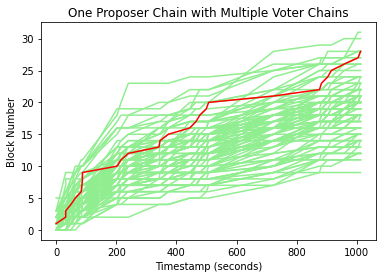

In [84]:
numberOfChainsToSee = 100

for i in range(0,numberOfChainsToSee):
    plt.plot(voterChainsCoordinates[i][1], voterChainsCoordinates[i][0], c="lightgreen", label="Voter Chain")

plt.plot(proposerBlocksCoordinates[1], proposerBlocksCoordinates[0], c ="red", label="Proposer Chain") 

# To show the plot
plt.title("One Proposer Chain with Multiple Voter Chains")
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Block Number")
plt.show()